In [7]:
!pip install joblib

In [1]:
!pip install underthesea

In [0]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
import os 
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib 
from nltk.stem import PorterStemmer
import operator 


In [8]:
emb = None
df = pd.read_json('/content/drive/My Drive/Sacarsm_Detection/Sarcasm_Headlines_Dataset_v2.json', lines = True)
df.head(10)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [9]:
df = df.drop(['article_link'],axis=1)
df.head(10)

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
5,0,my white inheritance
6,0,5 ways to file your taxes with less stress
7,1,richard branson's global-warming donation near...
8,1,shadow government getting too large to meet in...
9,0,lots of parents know this scenario


In [0]:
def standardize_data(row):
    row = re.sub(r"[\.,\?]+$-", "", row)
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ") \
        .replace("-", " ").replace("?", " ")
    row = row.strip()
    return row

In [0]:
from underthesea import word_tokenize
def tok(row):
  return word_tokenize(row, format='text')


In [0]:
def embedding(X_train, X_test):
    global  emb
    emb = TfidfVectorizer(min_df=5, max_df=0.8,max_features=3000,sublinear_tf=True)
    emb.fit(X_train)
    X_train =  emb.transform(X_train)
    X_test = emb.transform(X_test)

    joblib.dump(emb, 'tfidf.pkl')
    return X_train, X_test


In [0]:
df['headline'] = df.headline.apply(standardize_data)
df['headline'] = df.headline.apply(tok)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df['headline'], df['is_sarcastic'], test_size = 0.2, random_state = 42)


In [0]:
X_train, X_test = embedding(X_train, X_test)

In [31]:
model = svm.SVC(kernel='linear', C=1)
model.fit(X_train, Y_train)
joblib.dump(model, 'saved_model.pkl')

['saved_model.pkl']

In [21]:
score = model.score(X_test, Y_test)
print(score)

0.8226764500349406


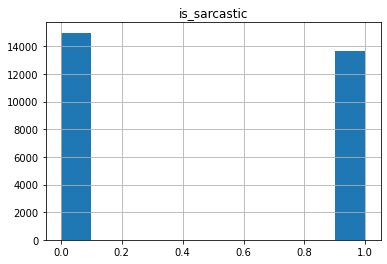

In [27]:
from matplotlib import pyplot
df.hist()
pyplot.show()

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
pre = model.predict(X_test)
print(accuracy_score(Y_test, pre))
print(confusion_matrix(Y_test, pre))
print(classification_report(Y_test, pre))

0.8226764500349406
[[2476  519]
 [ 496 2233]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2995
           1       0.81      0.82      0.81      2729

   micro avg       0.82      0.82      0.82      5724
   macro avg       0.82      0.82      0.82      5724
weighted avg       0.82      0.82      0.82      5724



In [53]:

def predict(text):
    
    """This function predicts if a sentence is sarcastic or not."""
    
    data = text
        
    data = re.sub('[^a-zA-Z]', ' ', data)
    
    s = []
    
    s.append(data)
    
    with open('/content/drive/My Drive/Sacarsm_Detection/tfidf.pkl', 'rb') as f:
        vectorizer = joblib.load(f)
    
    with open('/content/drive/My Drive/Sacarsm_Detection/saved_model.pkl', 'rb') as f:
        model = joblib.load(f)
    
    data = vectorizer.transform(s).toarray()
        
    prediction = model.predict(data)

    return int(prediction[0])


0

In [56]:
predict("mother comes pretty close to using word 'streaming' correctly")

1